<a href="https://colab.research.google.com/github/raghavmittal2/Final-Year-Project-2019-20/blob/master/Basic_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls /content/gdrive/"My Drive"/'Colab Notebooks'/

making_csv_from_data012.ipynb	   research_proj_sportstech.ipynb
research_proj_experiment1.1.ipynb  TREC_Washington_Post_collection.v2.json
research_proj_experiment1.2.ipynb  washington.csv
research_proj_experiment2.ipynb    washington_multi.csv
research_proj_multi.ipynb


In [2]:
os.path.isfile("/content/gdrive/My Drive/Colab Notebooks/washington_multi.csv")

True

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/washington_multi.csv", names=['category', 'date', 'content'])
# converting the Unix date into YYYY-MM-DD format
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.head()

,category,date,content
0,2,2012-01-01 00:54:00,Iowa caucuses: GOP presidential hopefuls makin...
1,2,2012-01-01 01:17:52,Many Iowans still don’t know who they will cau...
2,1,2012-01-01 03:58:16,NFL playoff picture: A breakdown of scenarios ...
3,2,2012-01-01 17:58:00,GOP’s battle plan against Obama: Use his own w...
4,2,2012-01-01 22:23:00,"Ron Paul leaves rosy outlooks, campaign promis..."


In [4]:
# TEXT PRE PROCESSING
import re
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

df['content'] = df['content'].astype(str).apply(lambda x:pre_process(x))
 
#show the second 'text' just for fun
df['content']

0        iowa caucuses gop presidential hopefuls making...
1        many iowans still don t know who they will cau...
2        nfl playoff picture a breakdown of scenarios p...
3        gop s battle plan against obama use his own wo...
4        ron paul leaves rosy outlooks campaign promise...
                               ...                        
28284    clinton trump win delegate rich arizona but fa...
28285    at the white house an abrupt chain reaction sp...
28286    trump announces u s will exit paris climate de...
28287    trump s new team offers muddled messages on sa...
28288    twitter reports super bowl s social statistics...
Name: content, Length: 28289, dtype: object

In [5]:
# unbalanced dataset
print(len(df[df.category == 0]))
print(len(df[df.category == 1]))
print(len(df[df.category == 2]))

2230
13478
12581


In [0]:
df_x = df["content"]
df_y = df["category"]

In [7]:
df_x

0        iowa caucuses gop presidential hopefuls making...
1        many iowans still don t know who they will cau...
2        nfl playoff picture a breakdown of scenarios p...
3        gop s battle plan against obama use his own wo...
4        ron paul leaves rosy outlooks campaign promise...
                               ...                        
28284    clinton trump win delegate rich arizona but fa...
28285    at the white house an abrupt chain reaction sp...
28286    trump announces u s will exit paris climate de...
28287    trump s new team offers muddled messages on sa...
28288    twitter reports super bowl s social statistics...
Name: content, Length: 28289, dtype: object

In [0]:
# STARTING TFIDF VECTORIZER
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("/content/gdrive/My Drive/Fake Newz/stopwords.txt")
cv = TfidfVectorizer(sublinear_tf = True, min_df = 5, norm = 'l2', stop_words= stopwords, ngram_range = (1, 2), max_features= 10000)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

In [10]:
x_traincv = cv.fit_transform(x_train.values.astype('U'))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['come', 'vis', 'viser', 'visest'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
x_testcv = cv.transform(x_test.values.astype('U'))

In [0]:
a = x_traincv.toarray()
plt.figure(figsize = (20, 4))
_ = plt.imshow(a[50: 100, 200:1000])

In [0]:
features = cv.get_feature_names()

In [0]:
# function to get top n tfidf values in row and return them with their corresponding feature names.
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df_feat = pd.DataFrame(top_feats)
    df_feat.columns = ['feature', 'tfidf']
    return df_feat

In [0]:
# function to get top tfidf features in specific document (matrix row)
def top_feats_in_doc(x_tr, features, row_id, top_n):
  row = np.squeeze(x_tr[row_id].toarray())
  return top_tfidf_feats(row, features, top_n)

In [15]:
# top 25 features in 1000th train article
print(top_feats_in_doc(x_traincv, features, 1000, 25))

             feature     tfidf
0           outgoing  0.226735
1      new president  0.206345
2             gallup  0.177712
3           approval  0.176253
4           incoming  0.175060
5    president first  0.151007
6            ratings  0.144457
7   approval ratings  0.143502
8    approval rating  0.142284
9         presidents  0.133242
10            viewed  0.132587
11           initial  0.131283
12            rating  0.131145
13        increasing  0.115342
14               guy  0.114755
15              bush  0.114387
16          replaced  0.114231
17       performance  0.113966
18             lower  0.113462
19           willing  0.113306
20            reagan  0.111064
21             trump  0.109696
22            switch  0.108313
23            thanks  0.102197
24             party  0.100236


In [0]:
# Return the top n features that on average are most important amongst documents in rows indentified by indices in grp_ids. 
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [17]:
# top 25 most important features in the whole corpus 
print(top_mean_feats(x_traincv, features, grp_ids=None, min_tfidf=0.1, top_n=25))

           feature     tfidf
0            trump  0.009850
1             espn  0.006428
2           sports  0.005472
3           romney  0.005400
4          orioles  0.005399
5            apple  0.004787
6          network  0.004283
7               am  0.004237
8          clinton  0.004184
9          channel  0.004004
10            masn  0.003720
11            golf  0.003614
12      fox sports  0.003491
13         company  0.003431
14           users  0.003405
15             mlb  0.003232
16             nfl  0.003204
17      nbc sports  0.003118
18      tournament  0.003059
19           espnu  0.002959
20            tour  0.002950
21          inning  0.002947
22  sports network  0.002886
23             nba  0.002878
24          google  0.002848


In [0]:
# Return a list of dfs, where each df holds top_n features and their mean tfidf value calculated across documents with the same class label.
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
   
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [0]:
# function to plot the tf idf feature importance of both classes
def plot_tfidf_classfeats_h(dfs):
    # Plot the data frames returned by the function plot_tfidf_classfeats()
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#F02491')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

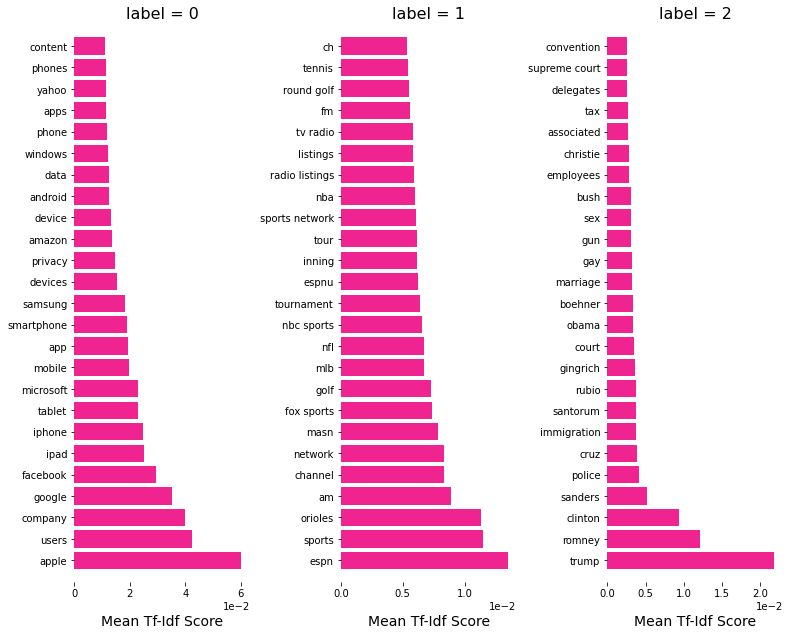

In [20]:
dfs = top_feats_by_class(x_traincv, y_train, features, min_tfidf=0.1, top_n= 25)    
plot_tfidf_classfeats_h(dfs)

Model Comparison

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


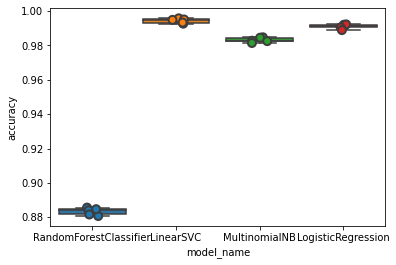

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_traincv, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.994388
LogisticRegression        0.991030
MultinomialNB             0.983209
RandomForestClassifier    0.883302
Name: accuracy, dtype: float64

Linear SVM Model

In [0]:
## Linear SVC Model
from sklearn.svm import LinearSVC
model = LinearSVC().fit(x_traincv, y_train)

In [24]:
y_pred = model.predict(x_testcv)
len(y_pred)

5658

In [25]:
y_actual = np.array(y_test)
y_actual

array([1, 2, 1, ..., 2, 1, 1])

In [26]:
# count is the number of prediction that were right
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_actual[i]:
    count = count + 1
count    

5616

In [27]:
results = confusion_matrix(y_actual, y_pred)
print('Confusion Matrix: ')
print(results)
print('Accuracy Score: ', accuracy_score(y_actual, y_pred))
print('Report: ')
print(classification_report(y_actual, y_pred))

Confusion Matrix: 
[[ 428    2   13]
 [   0 2683   19]
 [   3    5 2505]]
Accuracy Score:  0.9925768822905621
Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       443
           1       1.00      0.99      1.00      2702
           2       0.99      1.00      0.99      2513

    accuracy                           0.99      5658
   macro avg       0.99      0.99      0.99      5658
weighted avg       0.99      0.99      0.99      5658



Text(69.0, 0.5, 'Truth')

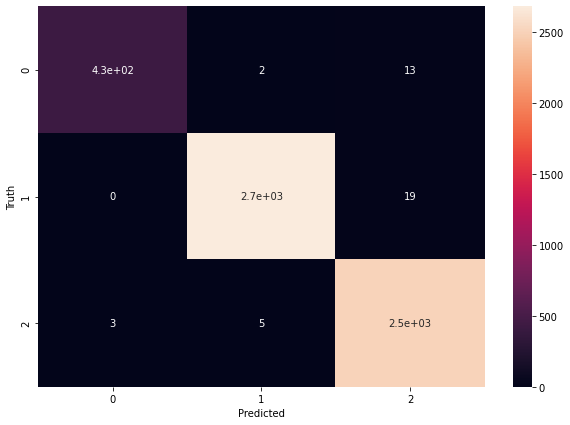

In [28]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(results, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')